In [23]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('ninjavan_thailand.csv')
df = df.dropna()

column_titles = ['rating','caption']
df1 = df.reindex(columns=column_titles)
df1

,rating,caption
0,5.0,(Translated by Google) Thank you very much (O...
2,1.0,Always wrong delivery!!! How do you even trai...
3,1.0,(Translated by Google) The delivery man is ver...
4,1.0,(Translated by Google) Please call the recipie...
5,5.0,(Translated by Google) I don't know what other...
...,...,...
922,1.0,(Translated by Google) Terrible staff Delivery...
923,3.0,(Translated by Google) Wait until the product ...
925,5.0,(Translated by Google) Good. Fast delivery. St...
928,5.0,(Translated by Google) Fast delivery and knowi...


In [25]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['Reviews'] = df1['middle'].str.split("(").str[0] 

In [26]:
df1['Reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['Reviews']
    if review == '0':
        df1['Reviews'][i] = review.replace('0', row['caption'])
df1

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_904/4092710684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews'][i] = review.replace('0', row['caption'])


,rating,caption,middle,Reviews
0,5.0,(Translated by Google) Thank you very much (O...,Thank you very much (Original,Thank you very much
2,1.0,Always wrong delivery!!! How do you even trai...,NaN,Always wrong delivery!!! How do you even trai...
3,1.0,(Translated by Google) The delivery man is ver...,The delivery man is very bad. It's the worst ...,The delivery man is very bad. It's the worst ...
4,1.0,(Translated by Google) Please call the recipie...,Please call the recipient and send it to the ...,Please call the recipient and send it to the ...
5,5.0,(Translated by Google) I don't know what other...,"I don't know what other people's are, but min...","I don't know what other people's are, but min..."
...,...,...,...,...
922,1.0,(Translated by Google) Terrible staff Delivery...,Terrible staff Delivery of the front of the h...,Terrible staff Delivery of the front of the h...
923,3.0,(Translated by Google) Wait until the product ...,Wait until the product has been designated da...,Wait until the product has been designated da...
925,5.0,(Translated by Google) Good. Fast delivery. St...,Good. Fast delivery. Staff speak politely. (...,Good. Fast delivery. Staff speak politely.
928,5.0,(Translated by Google) Fast delivery and knowi...,Fast delivery and knowing the route. Reliable...,Fast delivery and knowing the route. Reliable.


In [28]:
df1 = df1[['rating', 'Reviews']]
df1.to_csv('thninja1.csv')

In [35]:
#run 2nd csv
df2 = pd.read_csv('newestninjavan_thai_reviews.csv')

In [36]:
df2 = df2.dropna()
column_titles = ['rating','caption']
df2 = df2.reindex(columns=column_titles)


df2['middle'] = df2['caption'].str.split(")").str[1]
df2['Reviews'] = df2['middle'].str.split("(").str[0]

In [38]:
df2 = df2.reset_index()

df2['Reviews'].fillna('0', inplace = True)
for i, row in df2.iterrows(): 
    review = row['Reviews']

    if review == '0':
        df2['Reviews'][i] = review.replace('0', row['caption'])
        
df2

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_904/1013573201.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Reviews'][i] = review.replace('0', row['caption'])


,level_0,index,rating,caption,middle,Reviews
0,0,0,1.0,(Translated by Google) SHNV354186377 send it t...,SHNV354186377 send it to someone you don't kn...,SHNV354186377 send it to someone you don't kn...
1,1,1,1.0,(Translated by Google) The delivery man talks ...,"The delivery man talks badly, the service is ...","The delivery man talks badly, the service is ..."
2,2,2,5.0,(Translated by Google) Thank you very much (O...,Thank you very much (Original,Thank you very much
3,3,4,1.0,Always wrong delivery!!! How do you even trai...,NaN,Always wrong delivery!!! How do you even trai...
4,4,5,1.0,(Translated by Google) The delivery man is ver...,The delivery man is very bad. It's the worst ...,The delivery man is very bad. It's the worst ...
...,...,...,...,...,...,...
564,564,1083,5.0,"(Translated by Google) Good service, fast deli...","Good service, fast delivery (Original","Good service, fast delivery"
565,565,1084,5.0,(Translated by Google) The staff are very nice...,The staff are very nice 😂 (Original,The staff are very nice 😂
566,566,1085,5.0,(Translated by Google) Good service. Products ...,Good service. Products arrive as specified. T...,Good service. Products arrive as specified. T...
567,567,1087,1.0,"(Translated by Google) Fast delivery, one roun...","Fast delivery, one round. Try ordering first....","Fast delivery, one round. Try ordering first...."


In [39]:
df2 = df2[['rating', 'Reviews']]
df2.to_csv('thninja2.csv')

In [40]:
files = os.path.join("thninja*.csv")
files = glob.glob(files)
df_combi = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_combi.to_csv("combined_kerryth.csv")

df_combi

,Unnamed: 0,rating,Reviews
0,0,5.0,Thank you very much
1,2,1.0,Always wrong delivery!!! How do you even trai...
2,3,1.0,The delivery man is very bad. It's the worst ...
3,4,1.0,Please call the recipient and send it to the ...
4,5,5.0,"I don't know what other people's are, but min..."
...,...,...,...
1063,564,5.0,"Good service, fast delivery"
1064,565,5.0,The staff are very nice 😂
1065,566,5.0,Good service. Products arrive as specified. T...
1066,567,1.0,"Fast delivery, one round. Try ordering first...."


### Clean the data

In [41]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['Reviews_processed'] = pd.DataFrame(df_combi['Reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,rating,Reviews,Reviews_processed
0,0,5.0,Thank you very much,thank much
1,2,1.0,Always wrong delivery!!! How do you even trai...,always wrong delivery even train staff could e...
2,3,1.0,The delivery man is very bad. It's the worst ...,delivery man bad worst transport
3,4,1.0,Please call the recipient and send it to the ...,please call recipient send recipients hand ...
4,5,5.0,"I don't know what other people's are, but min...",dont know peoples mine day received items fast...
...,...,...,...,...
1063,564,5.0,"Good service, fast delivery",good service fast delivery
1064,565,5.0,The staff are very nice 😂,staff nice
1065,566,5.0,Good service. Products arrive as specified. T...,good service products arrive specified staff s...
1066,567,1.0,"Fast delivery, one round. Try ordering first....",fast delivery one round try ordering first get...


### Sentiment analysis 


In [42]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['Reviews_processed2'] = pd.DataFrame(df_combi['Reviews_processed'].apply(clean_text_round2))


In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['Sentiment'] = pd.DataFrame(df_combi['Reviews_processed2'].apply(sentiment_scores))

In [44]:
column_titles = ['rating','Reviews','Sentiment']
df_combi1 =df_combi.reindex(columns=column_titles)
df_combi1

,rating,Reviews,Sentiment
0,5.0,Thank you very much,Positive
1,1.0,Always wrong delivery!!! How do you even trai...,Negative
2,1.0,The delivery man is very bad. It's the worst ...,Negative
3,1.0,Please call the recipient and send it to the ...,Positive
4,5.0,"I don't know what other people's are, but min...",Neutral
...,...,...,...
1063,5.0,"Good service, fast delivery",Positive
1064,5.0,The staff are very nice 😂,Positive
1065,5.0,Good service. Products arrive as specified. T...,Positive
1066,1.0,"Fast delivery, one round. Try ordering first....",Neutral


In [45]:
df_combi1.to_csv('ninjath_allreviews.csv')

In [46]:
df_neg = df_combi1.drop(df_combi1[df_combi1['Sentiment'] != 'Negative'].index)
df_neg

,rating,Reviews,Sentiment
1,1.0,Always wrong delivery!!! How do you even trai...,Negative
2,1.0,The delivery man is very bad. It's the worst ...,Negative
6,1.0,At first the app said it was shipping. Call t...,Negative
10,1.0,Worst company I have dealt with. delay in del...,Negative
11,1.0,.2 This item is from another seller...just th...,Negative
...,...,...,...
1022,1.0,The service is terrible. Call to say that it'...,Negative
1026,1.0,"Hit the parcel back No contact, enough to cal...",Negative
1029,5.0,Fast delivery The product is not damaged.,Negative
1045,2.0,The shipping fee is cheap but the delivery is...,Negative


In [47]:
#combining the text into one long string for word cloud 
cloud_string = df_combi['Reviews_processed'].str.cat(sep=' ')

In [48]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 633),
 ('delivery', 473),
 ('good', 373),
 ('service', 270),
 ('staff', 269),
 ('fast', 236),
 ('call', 220),
 ('delivered', 128),
 ('product', 125),
 ('time', 124),
 ('polite', 116),
 ('bad', 101),
 ('slow', 95),
 ('received', 90),
 ('send', 87),
 ('item', 83),
 ('deliver', 76),
 ('parcel', 76),
 ('ninja', 74),
 ('goods', 72),
 ('days', 69),
 ('day', 64),
 ('first', 64),
 ('called', 64),
 ('sent', 61),
 ('items', 60),
 ('tell', 57),
 ('advance', 56),
 ('transport', 55),
 ('come', 53),
 ('well', 53),
 ('contact', 51),
 ('transportation', 50),
 ('politely', 50),
 ('like', 49),
 ('one', 48),
 ('dont', 47),
 ('still', 47),
 ('company', 47),
 ('status', 47),
 ('even', 45),
 ('van', 45),
 ('sending', 45),
 ('customer', 44),
 ('didnt', 43),
 ('inform', 43),
 ('cant', 42),
 ('recipient', 41),
 ('order', 41),
 ('arrived', 41),
 ('quickly', 40),
 ('speak', 40),
 ('receive', 39),
 ('waiting', 39),
 ('said', 38),
 ('today', 38),
 ('every', 37),
 ('wait', 37),
 ('ordered', 37),
 ('yet', 3

In [49]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use','call','one','though', 'didnt', 'dont', 'hasnt', 'c',]
stop_words = add_stop_words + stop 

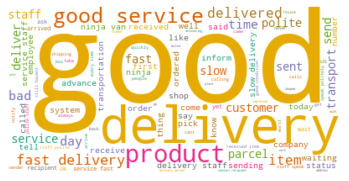

In [50]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

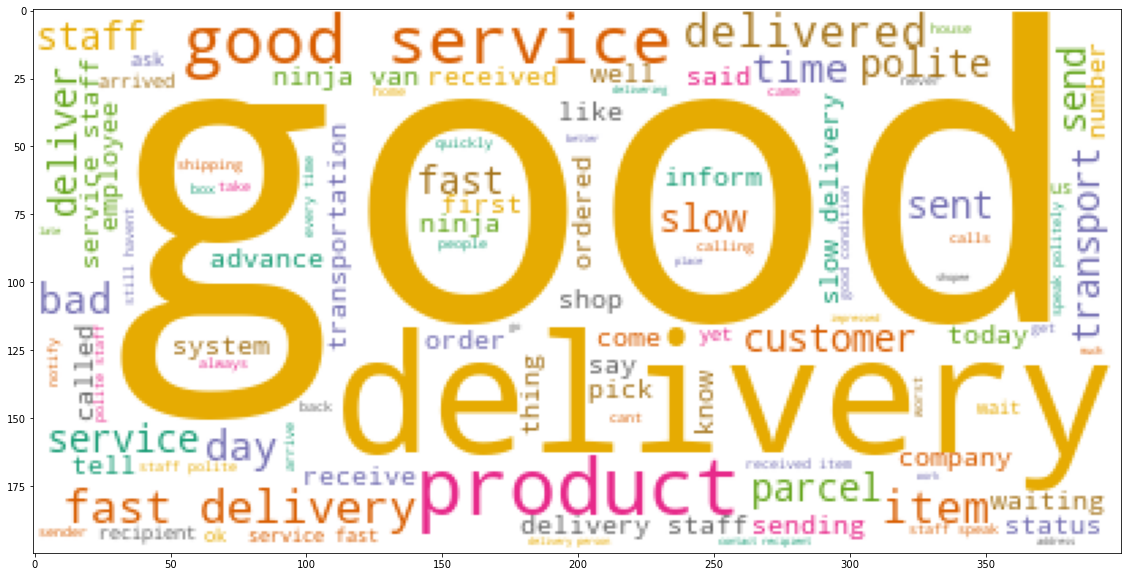

In [51]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [53]:
df_neg.head()

,rating,Reviews,Sentiment
1,1.0,Always wrong delivery!!! How do you even trai...,Negative
2,1.0,The delivery man is very bad. It's the worst ...,Negative
6,1.0,At first the app said it was shipping. Call t...,Negative
10,1.0,Worst company I have dealt with. delay in del...,Negative
11,1.0,.2 This item is from another seller...just th...,Negative


In [54]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['Reviews'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'Reviews':'Late reviews'})

In [56]:
column_titles = ['rating','Late reviews','Sentiment']
df_late = df_late.reindex(columns=column_titles)
df_late

,rating,Late reviews,Sentiment
18,2.0,NaN,Negative
20,1.0,NaN,Negative
36,1.0,NaN,Negative
45,1.0,NaN,Negative
48,1.0,NaN,Negative
50,1.0,NaN,Negative
63,1.0,NaN,Negative
81,1.0,NaN,Negative
101,1.0,NaN,Negative
112,1.0,NaN,Negative


In [20]:
df_late.to_csv('Late_reviews_ninjath.csv')